In [ ]:
'''
Need of Robust Regression
    - Linear regression fits a line or hyperplane that describes the linear relationship between inputs and the 
      target numeric value.If the data contains outlier values, the line can become biased, resulting in worse predictive 
      performance.
      
    - Robust regression refers to a suite of algorithms that are robust in the presence of outliers in training data.

*** Note: Linear regression assumes that the data is normally distributed.A specific problem with the probability distribution 
          of variables when using linear regression is outliers.
          
          A dataset may have outliers on either the input variables or the target variable, and both can cause problems for a 
          linear regression algorithm.

In [ ]:
'''
Some of Robust Regression Algorithms
    - Huber Regression
    - RANSAC (Random Sample Consensus) Regression
    - Theil Sen Regression
    - 

In [ ]:
'''

How Huber Regressor Works

Note : 
    - Here Change in the loss function of the Linear Regression
    - Huber loss is a balanced compromise between these two types (MSE and MAE)

Huber :(MSE + MAE) based on delta value we chosse either MSE or MAE

This function is quadratic(MSE) for small values of a and linear(MAE) for large values, 


loss = 0.5 * (y - f(x))^2                         if |y - f(x)| <= d

loss = 0.5 * d^2 + d * (|y - f(x)| - d)           if |y - f(x)| > d

where 
d is delta (Epsilon value)

(y — f(x)) = residuals

In [ ]:
'''
How RANSAC(Random Sample Consensus) Works
    - Step 1: Randomly select a number of samples to be inliers and fit a model (Linear Regression)
    - Step 2: Use the model fitted in the previous step to test all other data points and mark those points as inliers that 
              fall within a user-given tolerance. Points that are outside the user-given tolerance treated as Outliers.
    - Step 3: Refit the model using all inlier points.
    - Step 4: Estimate the error of the fitted model versus the inliers.
    - Step 5: Terminate the algorithm if the performance meets a certain desired value or if a fixed number of iterations 
              were reached; else go back to step1.

In [ ]:
'''
How TheilSen Regressor
    - TheilSen regression involves fitting multiple regression models on subsets of the training data and combining the 
      coefficients together in the end.

(100, 1) (100,)


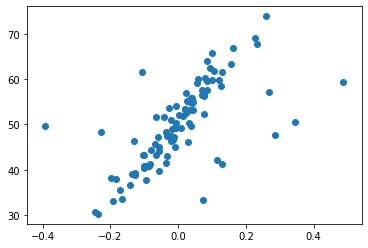

In [38]:
from random import random
from random import randint
from random import seed
from numpy import absolute
from numpy import mean
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
from numpy import std
from numpy import arange
 
# prepare the dataset (Includes Outliers)
def get_dataset():
    X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, \
                           bias=50, random_state=1)
    # add some artificial outliers
    seed(1)
    for i in range(10):
        factor = randint(2, 4)
        if random() > 0.5:
            X[i] += factor * X.std()
        else:
            X[i] -= factor * X.std()
    return X, y

# load dataset
X, y = get_dataset()
# summarize shape
print(X.shape, y.shape)
# scatter plot of input vs output
pyplot.scatter(X, y)
pyplot.show()

### 01 Lets Try Linear Regression (not robust)

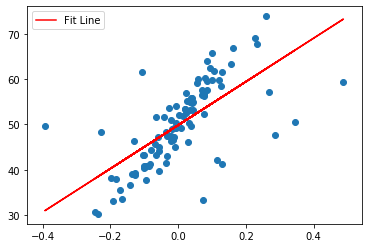

Mean MAE:5.260342552122636 (1.1486679656152239)


In [58]:
# load dataset
X, y = get_dataset()

# define the model
model = LinearRegression()

# fut the model on all data
model.fit(X, y)

y_pred = model.predict(X)

# plot the dataset
pyplot.scatter(X, y)
pyplot.plot(X,y_pred,c="r",label='Fit Line')
pyplot.legend()
pyplot.show()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print("Mean MAE:{0} ({1})".format(absolute(mean(results)),absolute(std(results))))

# We can see that linear regression achieves a MAE of about 5.2 on this dataset, providing an upper-bound in error.

### 02 Huber Regressor (Robust)

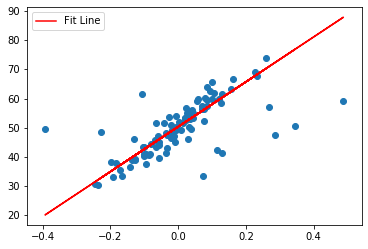

Mean MAE:4.434727563180386 (1.8678183729099374)


In [59]:
from sklearn.linear_model import HuberRegressor

# load dataset
X, y = get_dataset()

# define the model
model = HuberRegressor()

# fut the model on all data
model.fit(X, y)

y_pred = model.predict(X)

# plot the dataset
pyplot.scatter(X, y)
pyplot.plot(X,y_pred,c="r",label='Fit Line')
pyplot.legend()
pyplot.show()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print("Mean MAE:{0} ({1})".format(absolute(mean(results)),absolute(std(results))))

# We can see that Huber regression achieves a MAE of about 4.4 on this dataset, providing an upper-bound in error.

### 03 RANSAC (Random Sample Consensus) Regression

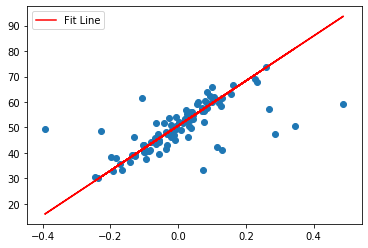

Mean MAE:4.434436967524124 (2.232717156039595)


In [60]:
from sklearn.linear_model import RANSACRegressor

# load dataset
X, y = get_dataset()

# define the model
model = RANSACRegressor()

# fut the model on all data
model.fit(X, y)

y_pred = model.predict(X)

# plot the dataset
pyplot.scatter(X, y)
pyplot.plot(X,y_pred,c="r",label='Fit Line')
pyplot.legend()
pyplot.show()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print("Mean MAE:{0} ({1})".format(absolute(mean(results)),absolute(std(results))))

# We can see that RANSAC regression achieves a MAE of about 4.4 on this dataset, providing an upper-bound in error.

### 04 Theil Sen Regression

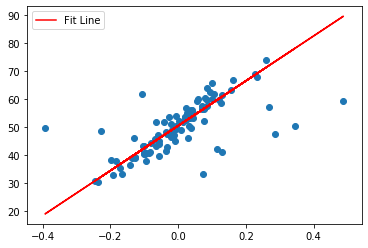

Mean MAE:4.371390239937131 (1.9609733695261808)


In [61]:
from sklearn.linear_model import TheilSenRegressor

# load dataset
X, y = get_dataset()

# define the model
model = TheilSenRegressor()

# fut the model on all data
model.fit(X, y)

y_pred = model.predict(X)

# plot the dataset
pyplot.scatter(X, y)
pyplot.plot(X,y_pred,c="r",label='Fit Line')
pyplot.legend()
pyplot.show()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print("Mean MAE:{0} ({1})".format(absolute(mean(results)),absolute(std(results))))

In [ ]:
'''
Observation from above the experiment

MAE value achieved for different experiment
    - Linear Regression  : 5.2
    - HuberRegressor     : 4.434
    - RANSACRegressor    : 4.432
    - TheilSenRegressor  : 4.371
    
TheilSenRegressor performing very good than Linear Regression
    